# MNIST KNN

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df_train = pd.read_csv("dataset/MNIST/train.csv")
df_test = pd.read_csv("dataset/MNIST/test.csv")

In [49]:
# training image data
X = np.array(df_train)[:, 1:]

# image label
Y = np.array(df_train)[:, 0]

In [50]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

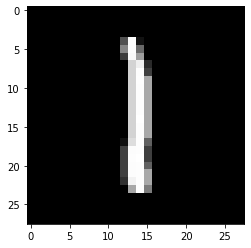

In [52]:
plt.imshow(X[1000].reshape((28,28)), cmap="gray");

In [53]:
Y.shape

(42000,)

In [54]:
df_train.shape

(42000, 785)

In [55]:
df_test.shape

(28000, 784)

In [60]:
test = np.array(df_test)

In [65]:
# distance function to calculate the distance between two points in euclidean space having n dimensions(784 in this case)
def distance(p1, p2):
    return np.sum((p2 - p1)**2)**.5


In [338]:
# knn function to find the k nearest points to the input point
# first we will calc distance from input to each training data point then sort(obv in increasing order) them and take 
# first k and make predictions based upon them

def knn(X , Y, test , k = 500):
    # it will have the distance( from the input point ) and label of each point as tuple ie : (distance, label)
    d = []
    r = X.shape[0]
    for i in range(r):
        d.append((distance(test, X[i]), Y[i]))
        
    # l is the list of sorted distance label
    l = np.array(sorted(d))[:, 1]
    l = l[:k]
    u = np.unique(l, return_counts = True)
    
    # convert the unique labels with their frequency into key value pair
    freq_dict = dict()
    for i in range(len(u[0])):
        freq_dict[u[0][i]] = u[1][i]
    
    # get the key whose value is maxmimum in the dictionary
    pred = int(max(freq_dict, key = freq_dict.get))
    
    accuracy = int(freq_dict[pred])
    
    percentage_accuracy = int((accuracy/k)*100)
    
    print("I can say with %d%% of accurancy that test input is %d" %(percentage_accuracy, pred))
    
    return freq_dict


    
    
    
    

In [351]:
knn(X, Y, test[1134])

I can say with 96% of accurancy that test input is 3


{3.0: 483, 5.0: 12, 8.0: 1, 9.0: 4}

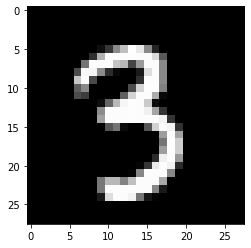

In [352]:
plt.imshow(test[1134].reshape(28, 28), cmap = "gray");

In [365]:
import matplotlib.image as img 
import cv2

In [366]:
# read the following images and store them into a list
img_name = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight"]
abs_path = "dataset/MNIST/"
grid = []
for each in img_name:
    grid.append(img.imread(abs_path + each + ".jpg"))

In [367]:
# convert the rgb
for i in range(len(grid)):
    grid[i] = cv2.cvtColor(grid[i], cv2.COLOR_RGB2GRAY)

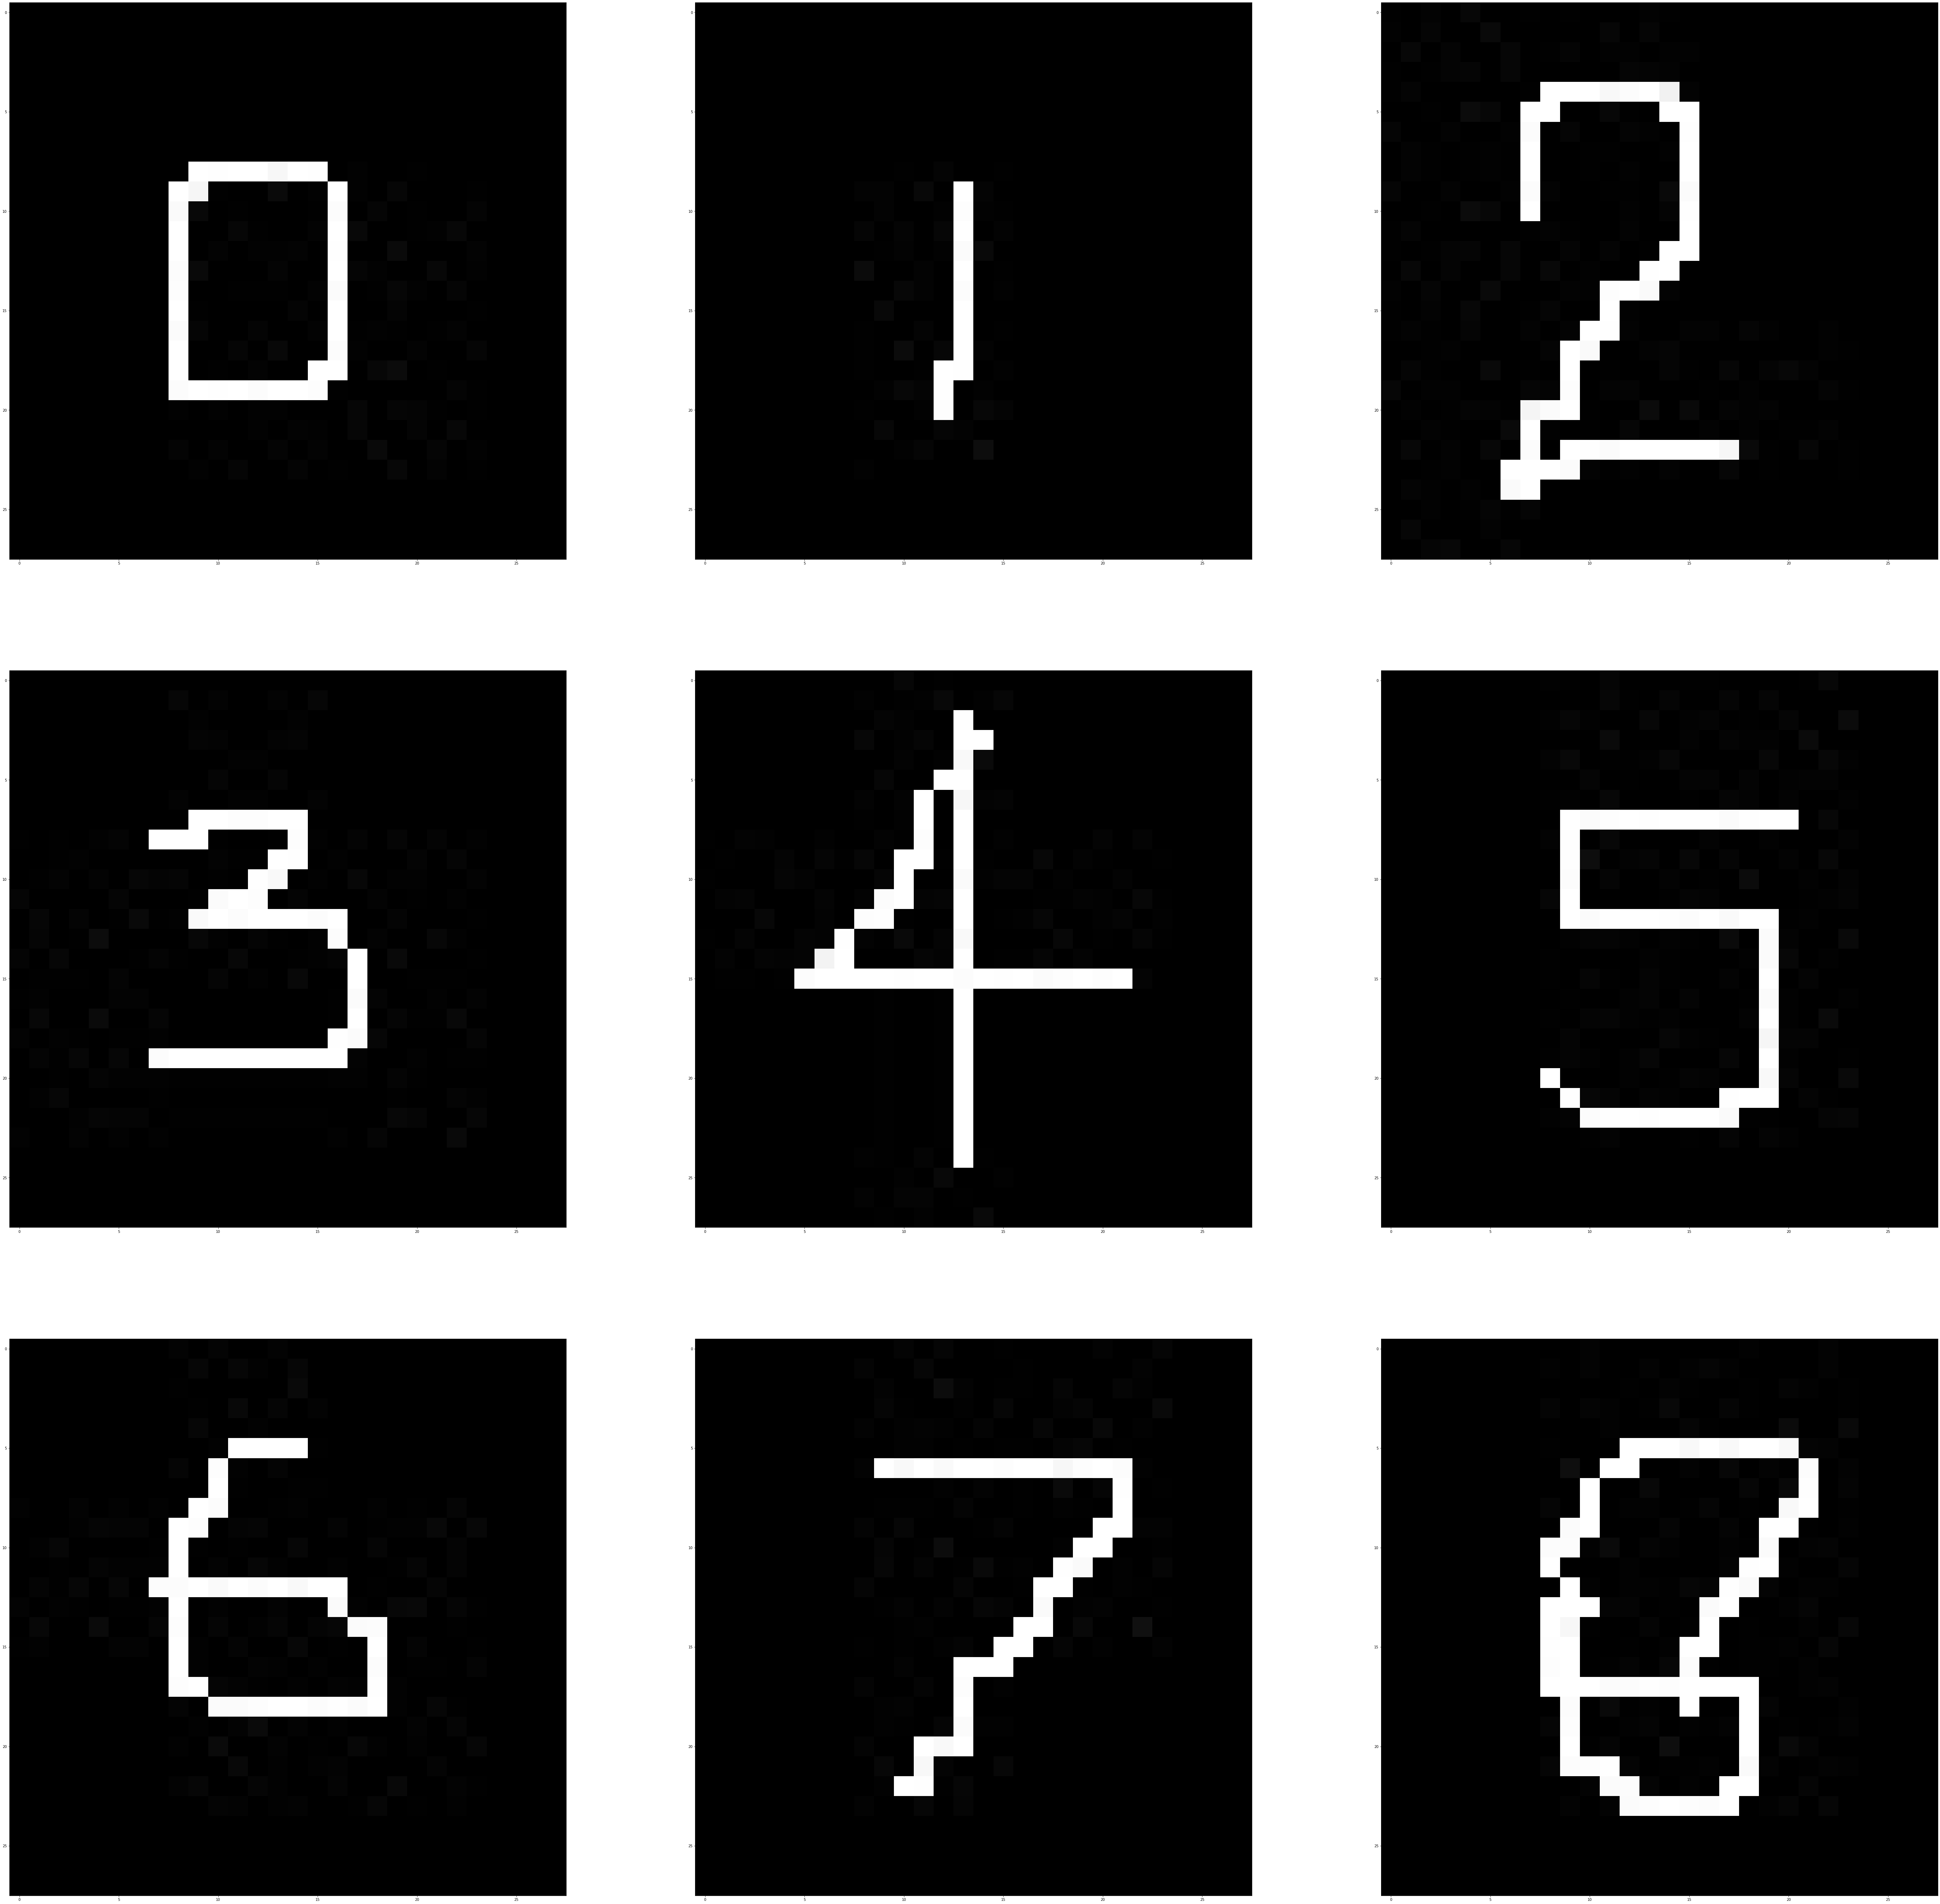

In [368]:
f, axarr = plt.subplots(3,3, figsize=(100,100))
n = 0;
for i in range(3):
        for j in range(3):
            axarr[i, j].imshow(grid[n], cmap = "gray")
            n = n + 1

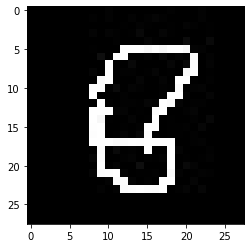

In [356]:
plt.imshow(grid[8].reshape(28, 28), cmap = "gray");

In [346]:
# conver the (28, 28) matrix into 1D array
for i in range(len(grid)):
    grid[i] = grid[i].ravel()

In [349]:
knn(X, Y, grid[4])

I can say with 82% of accurancy that test input is 1


{1.0: 414, 2.0: 4, 3.0: 2, 4.0: 45, 5.0: 6, 6.0: 11, 7.0: 9, 8.0: 2, 9.0: 7}

ValueError: operands could not be broadcast together with shapes (784,) (28,28,3) 